# Linear Systems and Least Squares Problems

## Solving Linear Equations

A system of simultaneous linear equations is written $$Ax = b.$$ Typically, $A$ is a given square matrix of order $n$, $b$ is a given column vector of $n$ components, and $x$ is an unknown column vector of $n$ components.

For example, the $2\times2$ system of equations
$$
2 x_1 + 3 x_2 = 4
$$
$$
5 x_1 + 4 x_2 = 3
$$

can be written as 
$$
\begin{bmatrix}2 & 3\\
5 & 4
\end{bmatrix} \begin{bmatrix}x_1\\
x_2
\end{bmatrix} = \begin{bmatrix}4\\
3
\end{bmatrix}.
$$

This equation determines the intersection of two lines.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

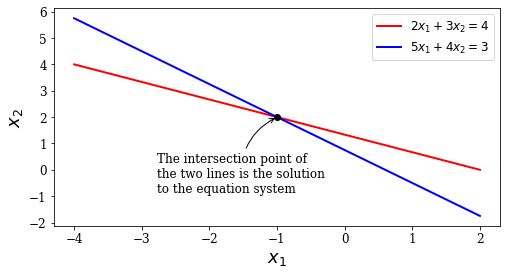

In [2]:
fig, ax = plt.subplots(figsize=(8, 4))

x1 = np.linspace(-4, 2, 100)

x2_1 = (4 - 2 * x1)/3
x2_2 = (3 - 5 * x1)/4

ax.plot(x1, x2_1, 'r', lw=2, label=r"$2x_1+3x_2=4$")
ax.plot(x1, x2_2, 'b', lw=2, label=r"$5x_1+4x_2=3$")

ax.plot(-1, 2, 'ko', lw=2)
ax.annotate("The intersection point of\nthe two lines is the solution\nto the equation system",
            xy=(-1, 2), xycoords='data',
            xytext=(-120, -75), textcoords='offset points', 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.3"))

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
ax.legend()


## Analytical solution of linear system

We can solve simple linear equations using a Computer Algebra Systems (CAS), such as Mathematica, Maple, MATLAB's symbolic toolbox, etc.

There are two notable Computer Algebra Systems (CAS) for Python:

* [SymPy](http://sympy.org/en/index.html) - A python module that can be used in any Python program, or in an IPython session, that provides powerful CAS features. 
* [Sage](http://www.sagemath.org/) - Sage is a full-featured and very powerful CAS enviroment that aims to provide an open source system that competes with Mathematica and Maple. Sage is not a regular Python module, but rather a CAS environment that uses Python as its programming language.

We will use SymPy in Jupyter Notebook.

To get started using SymPy in a Python program or notebook, import the module `sympy`:

In [3]:
import sympy

We can now solve the above equation as follows:

In [4]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A

Matrix([
[2, 3],
[5, 4]])

In [ ]:
x = A.solve(b)
x

We can also use symbols to represent the linear system and then solve it symbolically.

In [5]:
a11, a12, a21, a22 = sympy.symbols("a11, a12, a21, a22")
b1, b2 = sympy.symbols("b1, b2")

In [6]:
A = sympy.Matrix([[a11, a12], [a21, a22]])
A

Matrix([
[a11, a12],
[a21, a22]])

In [7]:
b = sympy.Matrix([b1, b2])
b

Matrix([
[b1],
[b2]])

In [8]:
x = A.solve(b)
x

Matrix([
[(-a12*b2 + a22*b1)/(a11*a22 - a12*a21)],
[ (a11*b2 - a21*b1)/(a11*a22 - a12*a21)]])

One could use the `subs` function to substitute the symbols with numbers.

In [9]:
x.subs({a11:2, a12:3, a21:5, a22:4, b1:4, b2:3})

Matrix([
[-1],
[ 2]])

A useful feature of the symbolic approach is to generate code in a program languages for relatively simple expressions.

In [ ]:
sympy.printing.pycode(x[0])

In [ ]:
sympy.printing.ccode(x[1])

In [ ]:
sympy.printing.pycode(x[1])

**Example:** Find the solution to these equations as a function of the free parameter `a`.  
$$
    x_0 + 6 x_1 + 3 x_2 = 3 \\
   2 x_0 + 4 x_1 + 3 x_2 = 2 \\
   3 x_0 + 3 x_1 + a x_2 = 1
$$
* Verify the solution by computing $A*x - b$ using SymPy
* At what value of `a` does the solution no longer exist?

In [12]:
a = sympy.symbols("a")
A = sympy.Matrix([[1, 6, 3], [2, 4, 3], [3, 3, a]])
b = sympy.Matrix([3, 2, 1])
x = A.solve(b)

In [13]:
x

Matrix([
[      24/(64*a - 216)],
[(4*a - 12)/(8*a - 27)],
[         4/(27 - 8*a)]])

We will see more examples of `SymPy` in later lectures.

## Numerical solution of linear systems

More commonly, linear systems are solved numerically, using functions provided by `scipy.linalg` (or `numpy.linalg`, which has more limited functionality).

In [14]:
import scipy.linalg as la

In [15]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [16]:
la.solve(A, b)

array([-1.,  2.])

Example: Solve the following linear system with three unknowns
$$
\begin{align*}
10x_{1}\text{−}7x_{2}&=7,\\
\text{−}3x_{1}+2x_{2}+6x_{3}&=4,\\
5x_{1}\text{−}x_{2}+5x_{3}&=6,
\end{align*}
$$
or in matrix format,
$$
\left[\begin{array}{ccc}
10 & -7 & 0\\
-3 & 2 & 6\\
5 & -1 & 5
\end{array}\right]\left[\begin{array}{c}
x_{1}\\
x_{2}\\
x_{3}
\end{array}\right]=\left[\begin{array}{c}
7\\
4\\
6
\end{array}\right].
$$

In [18]:
A = np.array([[10, -7, 0],[-3, 2, 6],[5, -1, 5]])
A

array([[10, -7,  0],
       [-3,  2,  6],
       [ 5, -1,  5]])

In [19]:
b = np.array([7, 4, 6])
b

array([7, 4, 6])

In [20]:
la.solve(A, b) # Just use this

array([ 0., -1.,  1.])

### Solving linear system vs. inversion of matrix

The solution to $Ax = b$ can be expressed as $x = A^{−1}b$, where $A^{−1}$ is the inverse of $A$. 

In [21]:
np.dot(la.inv(A),b) # Do not compute inverse

array([ 2.22044605e-16, -1.00000000e+00,  1.00000000e+00])

However, typically it is **unnecessary and inadvisable** to actually compute $A^{−1}$, because it is more expensive and less accurate.

We can illustrate this with a simple example: when solving $7x=21$ using single precision, it is more efficient and more accurate to compute $21\div 7$:

In [22]:
# Use single-precision to demonstrate the effect of accuracy
x = np.float32(21) / np.float32(7)
print("%.8f" % x)

3.00000000


Instead, computing $7^{-1}\times 21$:

In [23]:
# Use single-precision to demonstrate the effect of loss of accuracy
x = np.float32(1 / 7.) * np.float32(21.)
print("result: %.8f" % x)
print(" error: %.1e" % (x-3))

result: 3.00000024
 error: 2.4e-07


Explaining the above
* Integers that fit into the mantissa are exactly represented in floating-point numbers, so `21` and `7` can be exactly represented.
* Since the result `3` is also a whole integer there is no rounding error in the floating-point division `21/7`
* However, `1/7` is not exactly representable as a floating point number so there is some rounding error, consistent with the error guaranteed by IEEE arithmetic --- $\delta < \epsilon / 7 \approx \mathrm{1.2e-8}$
* Finally, the rounding error is amplified by multiplying by 21, so the final error should be less than 21*1.2e-8=3.6e-7 --- which it is.
* In this example computing with a scalar value we actually still have good relative error in the result --- this will not in general be the case when computing with matrices.

In [ ]:
print(np.finfo(np.float32))

### Gaussian elimination

For general square linear systems, the `solve` function first factorizes the matrix into the product of a lower triangular and an upper triangular matrix. In general, row interchanges are involved to avoid division by zero or near zero (i.e., to make the algorithm numerical stable).

This process is known as *LU factorization with partial pivoting*, which is equivalent to Gaussian elimination. In standard linear algebra convention, it is typically expressed as 
$$\hat{P}A = LU,$$
where L is lower triangular, $U$ is upper triangular, and $\hat{P}$ is a permutation matrix.

A *permutation matrix* acts on a vector to permute its elements --- it is an identity matrix with some rows and columns interchanged.  For example

In [25]:
P = np.array([[1,0,0],[0,0,1],[0,1,0]])
x = np.array([1,2,3])
print(" x:",x)
print("Px:",np.dot(P,x))

 x: [1 2 3]
Px: [1 3 2]


Continuing, consider this matrix
$$
A = \left[\begin{array}{ccc}
10 & -7 & 0\\
-3 & 2 & 6\\
5 & -1 & 5
\end{array}\right],
$$

we can compute that 

$$
L = \left[\begin{array}{ccc}
1 & 0 & 0\\
0.5 & 1 & 0\\
-0.3 & -0.04 & 1
\end{array}\right],\ 
U = \left[\begin{array}{ccc}
10 & -7 & 0\\
0 & 2.5 & 5\\
0 & 0 & 6.2
\end{array}\right], \mathrm{ and }
\hat{P} = \left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 1\\
0 & 1 & 0
\end{array}\right].
$$

However, in `SciPy`, the `lu` function uses the convention 
$$A = PLU,$$
so this permutation matrix $P$ is the inverse (transpose) of $\hat{P}$ in $$\hat{P} A = LU.$$

In [30]:
A = np.matrix("[10, -7 0; -3, 2, 6; 5, -1 5]")
b = np.matrix("[7; 4; 6]")
print(A)
P, L, U = la.lu(A)
print("P"); print(P)
print("L"); print(L)
print("U"); print(U)

[[10 -7  0]
 [-3  2  6]
 [ 5 -1  5]]
P
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
L
[[ 1.    0.    0.  ]
 [ 0.5   1.    0.  ]
 [-0.3  -0.04  1.  ]]
U
[[10.  -7.   0. ]
 [ 0.   2.5  5. ]
 [ 0.   0.   6.2]]


In [26]:
# Verify the results
np.dot(P, np.dot(L, U)) # PLU

array([[10., -7.,  0.],
       [-3.,  2.,  6.],
       [ 5., -1.,  5.]])

In [29]:
t1 = P.T * b
t2 = la.solve_triangular(L, t1, lower=True)
la.solve_triangular(U, t2, lower=False)

array([[ 0.],
       [-1.],
       [ 1.]])

In [ ]:
la.solve(A,b)

## Residual and Error

When using floating-point numbers, the solution is not exact due to rounding and cancellation errors.

Given $Ax = b$, let $x_*$ denote the exact solution, and $x$ denote the numerical solution. 

The *residual* (also known as the forward error) is defined as 

$$r = b - Ax.$$

The *error* (also known as the backward error) is defined as 
$$e = x - x_*,$$

\[ Both $e$ and $r$ are vectors. \]

*Gaussian elimination with partial pivoting is **guaranteed** to produce **small residuals**.  However, the **error in the solution can still be large**.*

When $A$ is singular, the linear equation does not have a unique solution (see below). When $A$ is nearly singular, the solution may be sensitive to rounding and other errors (including noise in your data), and hence the error may be large.

In the next couple of sections we will use [Hilbert matrices](https://en.wikipedia.org/wiki/Hilbert_matrix) to explore this issue.  These deceptively simple matrices

$$H_{ij} = \frac{1}{i+j+1} \mathrm{    } i,j=0,1,...$$

become increasingly close to being singular as they get larger.

In [32]:
N = 12

err = np.zeros(N)
res = np.zeros(N)

# compute errors and residual for a series of test matrices
for n in range(5, N):
    A = la.hilbert(n)
    b = np.dot(A, np.ones(n))

    x = la.solve(A, b)
    
    err[n] = np.max(np.abs(x - np.ones(n)))
    res[n] = np.max(np.abs(b - np.dot(A, x)))
    
    print('For n={0:2d}, the max-error is {1:e} and the max-residual is {2:e}'.format(n, err[n], res[n]))

For n= 5, the max-error is 3.096567e-11 and the max-residual is 2.220446e-16
For n= 6, the max-error is 4.153276e-10 and the max-residual is 4.440892e-16
For n= 7, the max-error is 1.902250e-08 and the max-residual is 4.440892e-16
For n= 8, the max-error is 2.351178e-07 and the max-residual is 4.440892e-16
For n= 9, the max-error is 1.597544e-05 and the max-residual is 2.220446e-16
For n=10, the max-error is 8.145608e-04 and the max-residual is 2.220446e-16
For n=11, the max-error is 1.406079e-02 and the max-residual is 4.440892e-16


This also illustrates that you can have a tiny residual (i.e., compute an $x$ such that $\Vert Ax-b \Vert$ is tiny), while having an apparently awful error (i.e., $\Vert x-x_*\Vert$ is large).  

Basically what is happening is that there is one more vectors that we will call $x_0$ for which 

$$ A x_0 \approx 0$$

within the precision of numerical computation (or relative to the size of the noise in your data).  This is called *ill-conditioning*. 

Therefore, if $Ax=b$ we can add any multiple ($c$) of $x_0$ onto $x$ and still satisfy the equation because

$ A (x + c x_0) = b \implies A x + c A x_0  = b  \implies   A x \approx  b$

Since the value of $c$ is not (well) determined by the equation you end up with a result ($x$) that is essentially defined by the noise in your calculation, so the solution is not "well-posed" and is sensitive to perturbation in the input.

## Norm and Condition Number

For vectors, the *norm* is the "length" of the vector. The Euclidean norm (or 2-norm) is exactly the Euclidean length of a vector:
$$\Vert x \Vert \equiv \sqrt{\sum_i x_i^2}.$$

It is equal to the Euclidean distance from the origin to the point $x$ in $\mathbb{R}^n$.

<img src="https://mathsimulationtechnology.files.wordpress.com/2012/02/la_r2vector_length.jpg" alt="Euclidean distance" height="300" width="300">

More generally, the $p$-norm for $1\leq p \leq \infty$ of a column vector is defined as 
$$\Vert x \Vert_p \equiv \sqrt[p]{\sum_i \vert x_i\vert ^p}.$$

When $p=\infty$, the infinity-norm is $\Vert x \Vert_\infty = \max\{\vert x_i\vert\}.$

<!--img src="https://image.slidesharecdn.com/cs445linearalgebraandmatlabtutorial-150831010550-lva1-app6891/95/linear-algebra-and-matlab-tutorial-16-638.jpg" alt="Unit circles in different norms"-->

The sensitivity of a matrix is measured by its [*condition number*](https://en.wikipedia.org/wiki/Condition_number). Intuitively, the condition number in $p$ norm is equal to the ratio of the *maximum magnification factor* of $A$ versus the *minimum magnification factor* of $A$ in $p$-norm, i.e.,
$$
\kappa_p(A) = 
\frac{\max_{x\not= 0}\Vert A x\Vert_p / \Vert x\Vert_p}{\min_{x\not= 0}\Vert A x\Vert_p / \Vert x\Vert_p}.
$$

<!--img src="http://mechanicaldesign.asmedigitalcollection.asme.org/data/journals/jmdedb/929508/md_136_03_031001_f001.png" alt="Stretching factor" width="500"-->

A system is *well-conditioned* if the condition number is close to 1, and it is *ill-conditioned* if the condition number is large (relative to the reciprocal of the squared root of machine epsilon).

For linear systems, $\kappa_p(A)\Vert r\Vert_p$ is an upper bound of the $\Vert e\Vert_p$. It is in general a good qualitative estimation of $\Vert e\Vert_p$.

Below we use again the Hilbert matrices to illustrate the problem.  For small Hilbert matrices the condition number is not too big and the results look fine.  But for the larger Hilbert matrices the condition number becomes huge and the backward error is big.

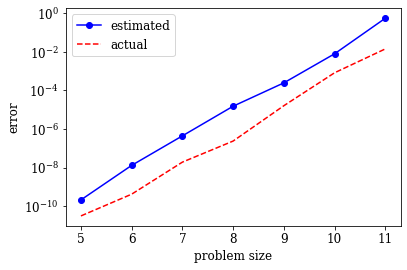

In [33]:
kappa = np.zeros(N)

# Compute condition numbers of a series of test matrices
for n in range(5, N):
    kappa[n] = np.linalg.cond(la.hilbert(n), np.inf)

ns = np.arange(5,N)
plt.semilogy(ns, kappa[ns] * res[ns], 'b-o', label='estimated')
plt.semilogy(ns, err[ns], 'r--', label='actual')
plt.xlabel('problem size')
plt.ylabel('error')
plt.legend(loc=2)

**Example:** For the SymPy matrix example above using $a=1$ and then again with $a=26.999999/8$
* Numerically solve the equation
* Compute the 2-norm of the forward and backward errors
* Explain what you see

## Efficiency

For $n$-by-$n$ linear systems, LU factorization requires about $\frac{2}{3}n^3$ floating-point operations for large $n$.

This means that if the number of unknowns grow by a factor of 2, then the computational cost will grow by a factor of 8. Therefore, it is impractical to solve very large problems using LU.

**It will take about 26 years to solve a dense matrix problem with 1 billion unknowns on the world's fastest computer as of 2016.**

Not only can LU factorization be more accurate than computing and applying the inverse matrix, it is also faster since 
* computing the inverse requires about about 33% more work for large $n$, and
* if there are multiple right hand sides (i.e., multiple $b$) then once $L$ and $U$ are computed, the additional solution can be computed in only $O(n^2)$ cost.


In [ ]:
import time

N = 11
ns = np.power(2, np.arange(N)) * 16
times = np.zeros(N)

# Perform timing use a series of test matrices
for i in range(N):
    n = ns[i]
    A = np.random.random((n,n))
    b = np.ones(n)

    start = time.time()
    x = la.solve(A, b)
    end = time.time()
    times[i] = end - start 
    
    print('n={0:5d}: it took {1:10g} seconds'.format(n, times[i]))

In [ ]:
plt.loglog(ns, times, 'b-o', label='numerical')
plt.loglog(ns, 1.e-11 * np.power(ns, 3), 'r--', label='reference')
plt.xlabel('problem size')
plt.ylabel('seconds')
plt.legend(loc=2)

Efficiency can be improved by taking advantage of the special structures of the matrix, for example, symmetry ($A=A^T$) and sparsity. See Chapter 10 of Numerical Python.

## Overdetermined Systems: Least Squares

In practice, we often have linear systems $Ax = b$, where $A$ is rectangular, with $m$ rows and $n$ columns. 

If $m>n$, the system is typically overdetermined. In this case, the problem must be restated as find $x$ such that
$$Ax \approx b.$$
I.e., instead of seeking an exact solution (because there is not one!) we are seeking a solution that is as close as possible in some sense.

This is typically solved by finding a least squares solution, which minimizes the 2-norm of the residual $r = b - Ax$, i.e., minimize 
$$\Vert r \Vert_2^2 = \sum_{i=1}^{m} r_i ^2 = \sum_{i=1}^{m} \left(b_i - \sum_{j=1}^n a_{ij} x_j \right) ^2$$

In `SciPy`, the method of least squares is provided by `scipy.linalg.lstsq`.   

It is often used in fitting noisy data --- in this setting $b$ is your vector of data and $x$ is the vector of fitting parameters.

By using in the fit more data points ($m$) than parameters ($n$) you can try to avoid over fitting --- i.e., fitting the noise instead of the signal.

### Notes on "singularity"

The generalization of *nonsingular* and *singular* square matrices to rectangular matrices are *full-rank* and *rank-deficient* matrices, respectively. When $m>n$, a full-rank matrix has linearly independent columns, which means that none of the columns can be written as a linear combination of the other columns.

Rank-deficient linear systems are more difficult to solve and require the definition of *pseudoinverse*, easily defined using singular value decomposition (SVD; next lecture).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

import scipy.linalg as la

### Example: Fitting a polynomial through some data data

We are given some data $(x_i, y_i),\quad i=0,1,..m-1$ sampled (with noise) from a function $y(x)$. 

We want to fit an approximation $\bar{y}(x)$ through this data --- i.e., solve in a least-squares sense the equations
$$
\bar{y}(x_i) = y_i, \mathrm{  }i=0,1,..m-1
$$
If our approximation is a quadratic polynomial 
$$
\bar{y}(x) = c_0 + x c_1 + x^2 c_2
$$
we want to solve 
$$
c_0 + x_i c_1 + x_i^2 c_2 = y_i, \mathrm{  }i=0,1,..m-1
$$
for $c = \left[\begin{array}{c}
c_{0}\\
c_{1}\\
c_{2}
\end{array}\right]$, again in a least-squares sense.

Writing things out a bit more explicitly, the equations are
$$
c_0 + x_0 c_1 + x_0^2 c_2 = y_0 \\
c_0 + x_1 c_1 + x_1^2 c_2 = y_1 \\
c_0 + x_2 c_1 + x_2^2 c_2 = y_2 \\
\vdots \\
c_0 + x_{m-1} c_1 + x_{m-1}^2 c_2 = y_{m-1}
$$
which you should be able so see we can rewrite as
$$
\left[\begin{array}{ccc}
1 & x_{0} & x_{0}^{2}\\
\vdots & \vdots & \vdots\\
1 & x_{m-1} & x_{m-1}^{2}
\end{array}\right]\left[\begin{array}{c}
c_{0}\\
c_{1}\\
c_{2}
\end{array}\right]=\left[\begin{array}{c}
y_{0}\\
\vdots\\
y_{m-1}
\end{array}\right]
$$
or, more compactly
$$
  X c = y
$$
where $X_{i j} = x_i^j$, $c$ is the vector of coefficients we are solving for, and $y$ is the input data.

So, to compute the fit we need to 
* load the data $y$ into a vector,
* construct the matrix $X$, and
* call the right routine to solve the least-squares equations

First, make some noisy test data

In [ ]:
np.random.seed(1234)

# define true model parameters
xexact = np.linspace(-1, 1, 100)
c0, c1, c2 = 1, 2, 3
yexact = c0 + c1 * xexact + c2 * xexact**2

# simulate noisy data points
m = 100
x = 1 - 2 * np.random.random(m)
x = np.sort(x) # for plotting it is convenient to have these in order
y = c0 + c1 * x + c2 * x**2 + 2*(np.random.random(m)-0.5)

# Let's see what the data looks like
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, 'go', alpha=0.5, label='Simulated data')
ax.plot(xexact, yexact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

Now we fit the data to the model using linear least squares --- first find and read the documentation for `np.linalg.lstq`

In [ ]:
# Lots of different ways to make X ... here are 2
X = np.empty((m,3))
X[:,0] = x**0
X[:,1] = x**1
X[:,2] = x**2
#print(X)

X = np.vstack([x**0, x**1, x**2]).T
#print(X)

c = la.lstsq(X, y)[0]
print("The fitted coefficients are", c)

# Compute the fit at the given values of x
yfit = c[0] + c[1] * x + c[2] * x**2

# Plot the input noisy data, the exact values, and the fit
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, 'go', alpha=0.5, label='Simulated data')
ax.plot(xexact, yexact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, yfit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

The same concept can be done using higher-degree polynomials. However, higher-degree fittings may suffer from oscillations.

In [ ]:
# fit the data to the model using linear least square: 
# 1st order polynomial
X = np.vstack([x**n for n in range(2)]).T
c = la.lstsq(X, y)[0]
yfit1 = sum([cn * x**n for n, cn in enumerate(c)])

# 15th order polynomial
X = np.vstack([x**n for n in range(16)]).T
c = la.lstsq(X, y)[0]
yfit15 = sum([cn * x**n for n, cn in enumerate(c)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, 'go', alpha=0.5, label='Simulated data')
ax.plot(xexact, yexact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, yfit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, yfit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

**If you really want to fit a polynomial:** NumPy provides a routine to handle all of this for you --- but behind the scenes it is doing pretty much just like the above.  Note that it returns the coefficients with the highest power first.

In [ ]:
c = np.polyfit(x, y, 2)
print("The fitted coefficients are", c)  # which are the same as computed above

**Example:** Below is a function that mimics noisy data coming from an experiment.  Fit the generated data to linear, quadratic and cubic functions, print the norm of corresponding residuals, and plot the fits and the data.  Use time $t$ in the range $[0,10]$.
* Generate a equally spaced list of 100 time points in \[0,10\]
* Compute an array of corresponding function values
* Compute the polynomial fits
* Evaluate the fits at the list of time points and compute the residuals
* Print
* Plot

In [ ]:
import math
import random
def f(t):
    return math.exp(-0.1*t)+0.1*(random.random()-0.5)

In [ ]:
t = np.linspace(0,10,100) # grid of t values in [0,10]
fv = np.vectorize(f)
ft = fv(t)                # corresponding values of f

# Solve
c1 = np.polyfit(t,ft,1)
c2 = np.polyfit(t,ft,2)
c3 = np.polyfit(t,ft,3)

# Compute the fits
y1 =                           c1[0]*t + c1[1]
y2 =              c2[0]*t**2 + c2[1]*t + c2[2]
y3 = c3[0]*t**3 + c3[1]*t**2 + c3[2]*t + c3[3]

# Compute the norms of the residuals
r1 = la.norm(y1-ft)
r2 = la.norm(y2-ft)
r3 = la.norm(y3-ft)

# Print the fits and the residuals
print("   linear: %.2f :"%r1, c1)
print("quadratic: %.2f :"%r2, c2)
print("    cubic: %.2f :"%r3, c3)

# Plot
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t, ft, 'go', alpha=0.5, label='Simulated data')
ax.plot(t, y1, 'b-', label="$%.2f%+.2ft$"%(c1[1],c1[0]))
ax.plot(t, y2, 'r-', label="$%.2f%+.2ft%+.1et^2$"%(c2[2],c2[1],c2[0]))
ax.plot(t, y3, 'y-', label="$%.2f%+.2ft%+.1et^2%+.1et^3$"%(c3[3],c3[2],c3[1],c3[0]))
ax.legend(loc=1)

## More Advanced Topic: Algorithms for Solving Least Squares

To solve a full-rank least-squares system at a lower-level, you can use *QR factorization*
$$
A=QR,
$$
where $Q$ is orthogonal in that $Q^TQ=I$ and $R$ is upper triangular. 

To solving $Ax=b$, we simply compute
$$ Rx=Q^Tb.$$

In [ ]:
# Consider the previous example for quadratic fitting
m = 100
x = 1 - 2 * np.random.random(m)
x = np.sort(x) # for plotting it is convenient to have these in order
c0, c1, c2 = 1, 2, 3
y = c0 + c1 * x + c2 * x**2 + 2*(np.random.random(m)-0.5)
X = np.vstack([x**n for n in range(3)]).T

# The following is equivalent to c = la.lstsq(X, y)[0]
Q, R = la.qr(X, mode='economic')
c = la.solve_triangular(R, Q.T.dot(y), lower=False)
print("The fitted coefficients are", c)

# Compare it with the high-level function
c = la.lstsq(X, y)[0]
print("The fitted coefficients are", c)


Another approach is to use the *singular-value decomposition* (*SVD*) of $A\in \mathbb{R}^{m\times n}$ for $m\ge n$,
$$
A=U\Sigma V^T,
$$
where $U\in \mathbb{R}^{m\times n}$ and $V\in \mathbb{R}^{n\times n}$ are composed of orthonormal column vectors (i.e., $U^{T}U=I$ and $V^{T}V=I$), and
$$
\Sigma=\begin{bmatrix}\sigma_{1}\\
 & \sigma_{2}\\
 &  & \ddots\\
 &  &  & \sigma_{n}
\end{bmatrix}
$$
 is a diagonal matrix with the singular values $\sigma_1\ge \sigma_2 \ge \cdots \ge \sigma_n \ge 0$. 
 
This version is known as the "economic" or "thin" SVD. There is a corresponding full SVD, for which $U\in \mathbb{R}^{m\times m}$, $V\in \mathbb{R}^{n\times n}$, and $\Sigma\in \mathbb{R}^{m\times n}$.

To solving $Ax=b$, we simply compute
$$
x=\sum_{i}\frac{u_i^Tb}{\sigma_i}v_i,
$$
where $u_i$ and $v_i$ denote the $i$th column of $U$ and $V$.



In [ ]:
U, Sigma, Vt = la.svd(X, full_matrices=False)

c = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    c += 1/Sigma[i] * U[:,i].dot(y) * Vt[i,:]
print(c)

The [SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition) is a very fundamental concept in linear algebra and it is widely used in many applications, such as the principal component analysis (PCA). 

For full-rank systems, the condition number of $A\in \mathbb{R}^{m\times n}$ is defined as the ratio between the largest and smallest singular values (i.e., $\kappa(A)=\frac{\sigma_1}{\sigma_n}$ if $m\ge n$).

For rank-deficient systems, the $rank$ of $A$ is equal to the number of nonzero singular values.

SVD is much slower than QR, but its advantage is that it can be used to solve rank-deficient least-squared problems by computing 
$$
x=\sum_{\sigma_i>0}\frac{u_i^Tb}{\sigma_i}v_i,
$$
where $u_i$ and $v_i$ denote the $i$th column of $U$ and $V$.

The `scipy.linalg.lstsq` function uses SVD internally and it can return the rank and the singular values.

In [ ]:
 la.lstsq?

## Further reading

Reading on linear algebra:
* Chapter 5 of Numerical Python book
* Chapter 10 of Numerical Python book for sparse matrices

Reading on SymPy:
* Chapter 3 of Numerical Python book

## Acknowledgements

Adapted from J.R. Johansson's Scientific Python Lectures available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).